# Economic Data Analysis

## Prilminary information

### Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df =pd.read_csv("Cost_of_Living_Index_by_Country_2024.csv")
df.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


### CSV Size

In [8]:
df.shape

(121, 8)

### Columns in CSV

In [9]:
df.columns

Index(['Rank', 'Country', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index'],
      dtype='object')

In [11]:
df.dtypes

Rank                                int64
Country                            object
Cost of Living Index              float64
Rent Index                        float64
Cost of Living Plus Rent Index    float64
Groceries Index                   float64
Restaurant Price Index            float64
Local Purchasing Power Index      float64
dtype: object

### Description about the Data

In [12]:
df.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,61.000000,43.555372,16.052893,30.357851,44.228926,36.471074,65.094215
std,35.073732,16.147574,11.412267,13.263721,17.055109,18.258110,39.569094
min,1.000000,18.800000,2.400000,11.100000,17.500000,12.800000,2.300000
25%,31.000000,30.200000,8.500000,19.800000,31.600000,21.600000,34.800000
50%,61.000000,39.500000,12.400000,27.000000,40.500000,33.100000,50.600000
75%,91.000000,52.800000,20.100000,37.000000,53.700000,47.200000,99.400000
max,121.000000,101.100000,67.200000,74.900000,109.100000,97.000000,182.500000


### Checking For null Values

In [13]:
df.isnull().sum()

Rank                              0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

In [15]:
df.nunique()

Rank                              121
Country                           121
Cost of Living Index              107
Rent Index                         99
Cost of Living Plus Rent Index    104
Groceries Index                   104
Restaurant Price Index            112
Local Purchasing Power Index      117
dtype: int64

## Data Visualization Part

### Corelation Matrix

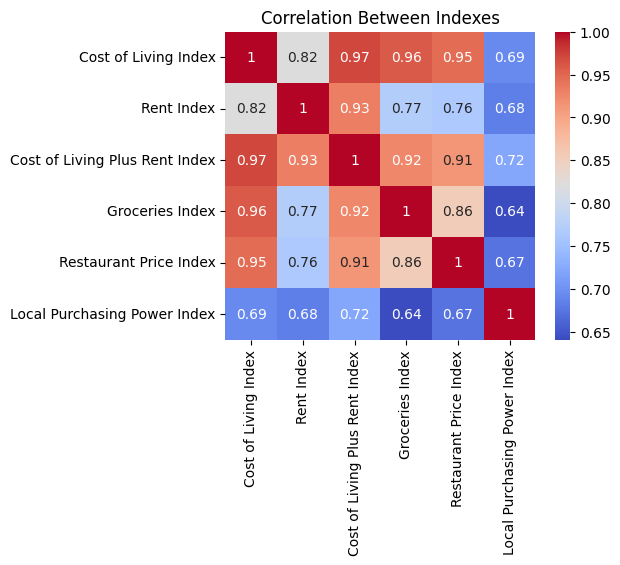

In [20]:
df_subset = df.iloc[:, 2:]  # This excludes 'Rank' and 'Country'

plt.figure(figsize=(5, 4))
sns.heatmap(df_subset.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Indexes")
plt.show()

In [27]:
data_sorted = df.sort_values(by='Cost of Living Index', ascending=False)

### Top 5 Most Expensive Cities

In [32]:
top_10_expensive = data_sorted.head(5)
print("Top 10 Most Expensive Countries:")
print(top_10_expensive[['Country', 'Cost of Living Index']])

Top 10 Most Expensive Countries:
       Country  Cost of Living Index
0  Switzerland                 101.1
1      Bahamas                  85.0
2      Iceland                  83.0
3    Singapore                  76.7
4     Barbados                  76.6


### Top 5 Least expensive Cities

In [31]:

top_10_cheapest = data_sorted.tail(5)
print("Top 10 Cheapest Countries:")
print(top_10_cheapest[['Country', 'Cost of Living Index']])


Top 10 Cheapest Countries:
        Country  Cost of Living Index
116  Bangladesh                  22.5
117       India                  21.2
118       Egypt                  21.0
119       Libya                  20.4
120    Pakistan                  18.8


### Expensive vs Cheap

C:\Users\kamas\AppData\Local\Temp\ipykernel_2460\939076016.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_expensive, x='Cost of Living Index', y='Country', palette='viridis')
C:\Users\kamas\AppData\Local\Temp\ipykernel_2460\939076016.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_cheapest, x='Cost of Living Index', y='Country', palette='viridis')


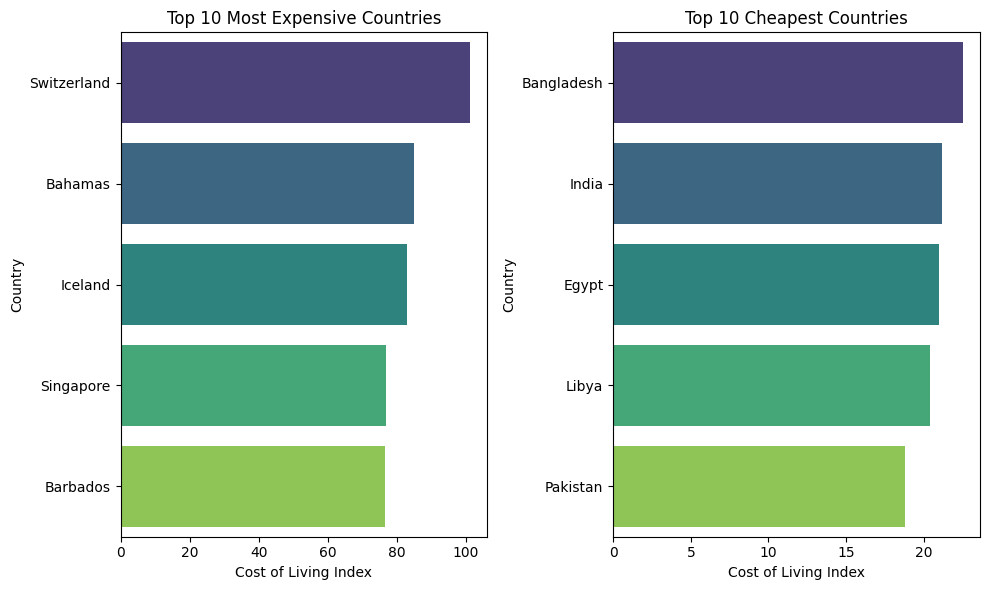

In [34]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=top_10_expensive, x='Cost of Living Index', y='Country', palette='viridis')
plt.title('Top 10 Most Expensive Countries')
plt.xlabel('Cost of Living Index')

plt.subplot(1, 2, 2)
sns.barplot(data=top_10_cheapest, x='Cost of Living Index', y='Country', palette='viridis')
plt.title('Top 10 Cheapest Countries')
plt.xlabel('Cost of Living Index')

plt.tight_layout()
plt.show()

### Distribution of Cost of Living Index

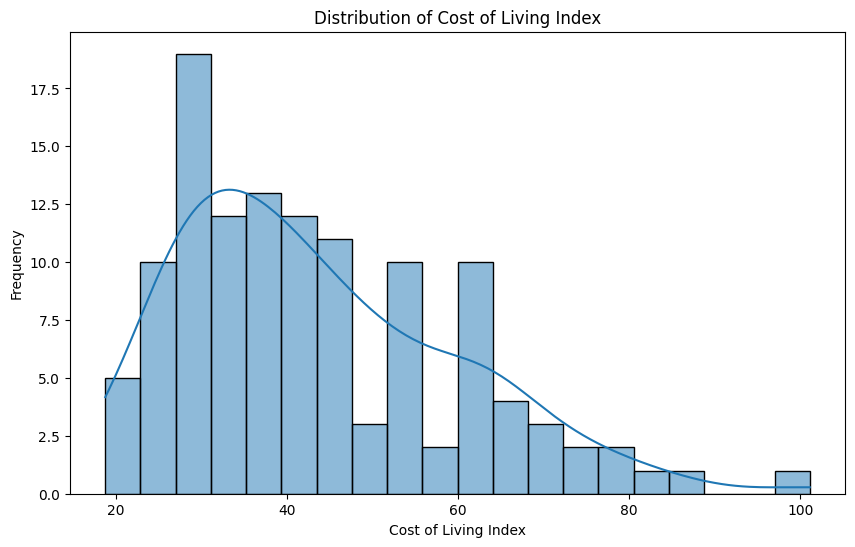

In [42]:
# Plot the distribution of the Cost of Living Index
plt.figure(figsize=(10, 6))
sns.histplot(df['Cost of Living Index'], bins=20, kde=True)
plt.title('Distribution of Cost of Living Index')
plt.xlabel('Cost of Living Index')
plt.ylabel('Frequency')
plt.show()

### Seaborn Plots 

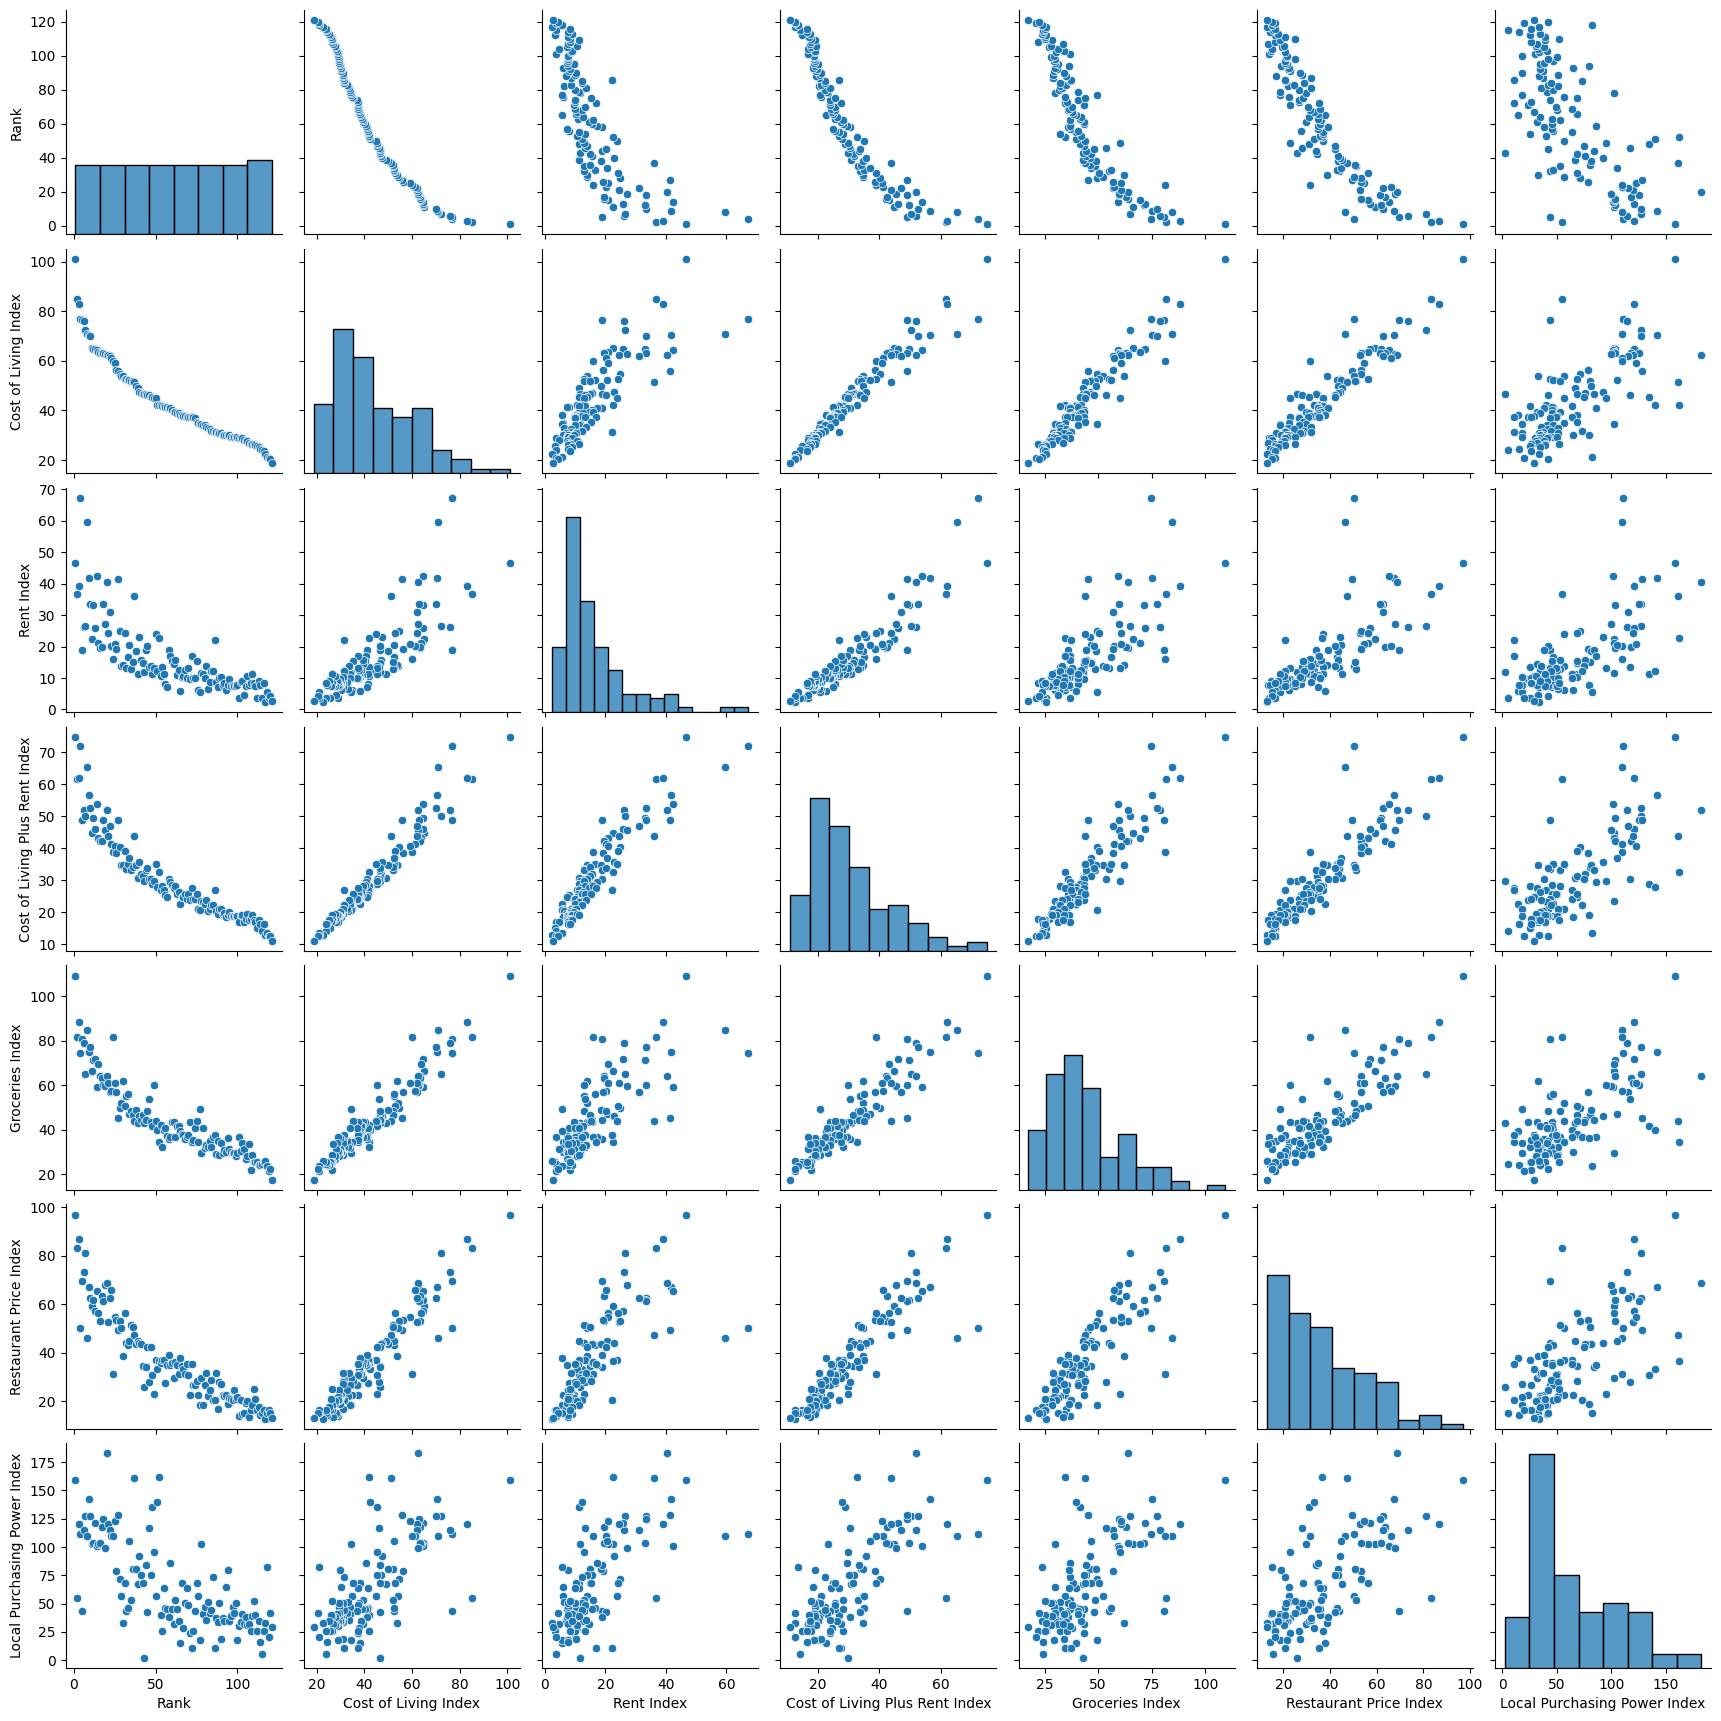

In [35]:
sns.pairplot(df)

## Model Building

###  Import required libraries

In [36]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

### Loading DataSet and Defining Parameters 

In [37]:
# 📥 Load dataset
df = pd.read_csv("Cost_of_Living_Index_by_Country_2024.csv")

# 🎯 Target and Features
X = df[[
    'Rent Index',
    'Cost of Living Plus Rent Index',
    'Groceries Index',
    'Restaurant Price Index',
    'Local Purchasing Power Index'
]]

y = df['Cost of Living Index']

### Training and Testing the Model

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Models

In [39]:

results = {}

# 2️⃣ Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
results["Decision Tree"] = {
    "R2 Score": r2_score(y_test, y_pred_dt),
   
}

# 3️⃣ Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results["Random Forest"] = {
    "R2 Score": r2_score(y_test, y_pred_rf),
    
}


### Accuracies of the Models

In [41]:


for model, metrics in results.items():
    print(f"--- {model} ---")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print()


--- Decision Tree ---
R2 Score: 0.9220

--- Random Forest ---
R2 Score: 0.9061

